<a href="https://colab.research.google.com/github/lameis2611/cars-project/blob/main/%F0%9F%8E%80%F0%9F%9A%95%F0%9F%8E%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

In [ ]:
!git clone https://github.com/alexeygrigorev/mlbookcamp-code


fatal: destination path 'mlbookcamp-code' already exists and is not an empty directory.


In [ ]:
df = pd.read_csv('/content/mlbookcamp-code/chapter-02-car-price/data.csv')

In [ ]:
df.head(5)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
len(df.columns)


16

In [ ]:
len(df)


11914

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

Cleaning


In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')


In [ ]:
df.head()


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
df.columns


Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [ ]:
df.rename(columns={'msrp': 'price'}, inplace=True)


In [ ]:
df.columns


Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'price'],
      dtype='object')

EDA


In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
df.describe()


,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,price
count,"11,914.00","11,845.00","11,884.00","11,908.00","11,914.00","11,914.00","11,914.00","11,914.00"
mean,"2,010.38",249.39,5.63,3.44,26.64,19.73,"1,554.91","40,594.74"
std,7.58,109.19,1.78,0.88,8.86,8.99,"1,441.86","60,109.10"
min,"1,990.00",55.00,0.00,2.00,12.00,7.00,2.00,"2,000.00"
25%,"2,007.00",170.00,4.00,2.00,22.00,16.00,549.00,"21,000.00"
50%,"2,015.00",227.00,6.00,4.00,26.00,18.00,"1,385.00","29,995.00"
75%,"2,016.00",300.00,6.00,4.00,30.00,22.00,"2,009.00","42,231.25"
max,"2,017.00","1,001.00",16.00,4.00,354.00,137.00,"5,657.00","2,065,902.00"


In [ ]:

#df.describe(include='object')
df.describe(include=['O'])


,make,model,engine_fuel_type,transmission_type,driven_wheels,market_category,vehicle_size,vehicle_style
count,11914,11914,11911,11914,11914,8172,11914,11914
unique,48,915,10,5,4,71,3,16
top,Chevrolet,Silverado 1500,regular unleaded,AUTOMATIC,front wheel drive,Crossover,Compact,Sedan
freq,1123,156,7172,8266,4787,1110,4764,3048


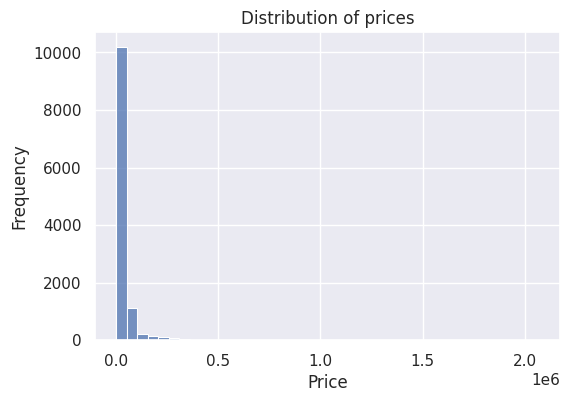

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df.price, bins=40)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')
plt.show()


transform price with log

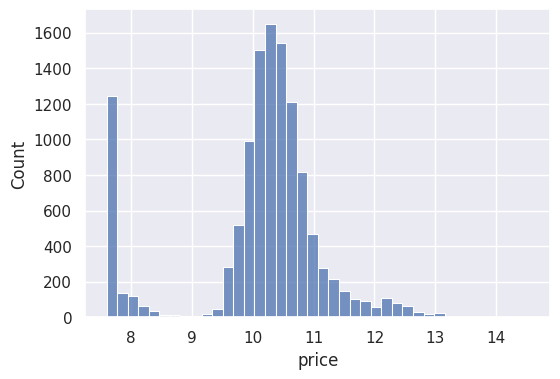

In [ ]:
df['price'] = np.log1p(df.price)
plt.figure(figsize=(6, 4))
sns.histplot(df.price, bins=40)
plt.show()

In [ ]:
for col in df.columns:
    print( col,':', df[col].nunique() )
    print(df[col].value_counts().nlargest(5))
    print('\n' + '*'*20+'\n')

make : 48
make
Chevrolet     1123
Ford           881
Volkswagen     809
Toyota         746
Dodge          626
Name: count, dtype: int64

********************

model : 915
model
Silverado 1500        156
Tundra                140
F-150                 126
Sierra 1500            90
Beetle Convertible     89
Name: count, dtype: int64

********************

year : 28
year
2015    2170
2016    2157
2017    1668
2014     589
2012     387
Name: count, dtype: int64

********************

engine_fuel_type : 10
engine_fuel_type
regular unleaded                  7172
premium unleaded (required)       2009
premium unleaded (recommended)    1523
flex-fuel (unleaded/E85)           899
diesel                             154
Name: count, dtype: int64

********************

engine_hp : 356
engine_hp
200.00    456
170.00    351
210.00    320
240.00    268
285.00    246
Name: count, dtype: int64

********************

engine_cylinders : 9
engine_cylinders
4.00     4752
6.00     4489
8.00     2031
12.00  

Feature Selection:

* make
* model
* year
* engine_hp
* engine_cylinders
* vehicle_size
* number_of_doors
* highway_mbg
* city_mbg
* popularity


Fill Missing values


In [ ]:
df.isnull().sum()

,0
make,0
model,0
year,0
engine_fuel_type,3
engine_hp,69
engine_cylinders,30
transmission_type,0
driven_wheels,0
number_of_doors,6
market_category,3742


In [ ]:
df['engine_hp'] = df['engine_hp'].fillna(df['engine_hp'].mean())
df['engine_cylinders'] = df['engine_cylinders'].fillna(df['engine_cylinders'].mean())
df['number_of_doors'] = df['number_of_doors'].fillna(df['number_of_doors'].median())



In [ ]:
df = df.drop(['engine_fuel_type', 'driven_wheels', 'market_category', 'vehicle_style', 'transmission_type'],axis=1)
df.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'number_of_doors', 'vehicle_size', 'highway_mpg', 'city_mpg',
       'popularity', 'price'],
      dtype='object')

In [ ]:
print(df.isnull().sum())

make                0
model               0
year                0
engine_hp           0
engine_cylinders    0
number_of_doors     0
vehicle_size        0
highway_mpg         0
city_mpg            0
popularity          0
price               0
dtype: int64


encoding

In [ ]:
df = pd.get_dummies(df, columns=['make', 'model', 'vehicle_size'])

In [ ]:
df.head()


,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,price,make_Acura,make_Alfa Romeo,...,model_iA,model_iM,model_iQ,model_tC,model_xA,model_xB,model_xD,vehicle_size_Compact,vehicle_size_Large,vehicle_size_Midsize
0,2011,335.00,6.00,2.00,26,19,3916,10.74,False,False,...,False,False,False,False,False,False,False,True,False,False
1,2011,300.00,6.00,2.00,28,19,3916,10.61,False,False,...,False,False,False,False,False,False,False,True,False,False
2,2011,300.00,6.00,2.00,28,20,3916,10.50,False,False,...,False,False,False,False,False,False,False,True,False,False
3,2011,230.00,6.00,2.00,28,18,3916,10.29,False,False,...,False,False,False,False,False,False,False,True,False,False
4,2011,230.00,6.00,2.00,28,18,3916,10.45,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
X = df.drop(['price'], axis=1)
X.head()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,make_Acura,make_Alfa Romeo,make_Aston Martin,...,model_iA,model_iM,model_iQ,model_tC,model_xA,model_xB,model_xD,vehicle_size_Compact,vehicle_size_Large,vehicle_size_Midsize
0,2011,335.00,6.00,2.00,26,19,3916,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,2011,300.00,6.00,2.00,28,19,3916,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,2011,300.00,6.00,2.00,28,20,3916,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,2011,230.00,6.00,2.00,28,18,3916,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,2011,230.00,6.00,2.00,28,18,3916,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
Y = df['price']
Y.head()

,price
0,10.74
1,10.61
2,10.50
3,10.29
4,10.45


split data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

modeling using linear regressiion

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

In [ ]:
y_pred_train = model.predict(X_train)

mse_train = mean_squared_error(Y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(Y_train, y_pred_train)

print(f"RMSE (Root Mean Squared Error) on training data: {rmse_train}")
print(f"R^2 Score on training data: {r2_train}")

RMSE (Root Mean Squared Error) on training data: 0.17400021293885726
R^2 Score on training data: 0.9750163446168004


model training :decision tree

In [ ]:
Model = DecisionTreeRegressor(random_state=42)

In [ ]:
Model.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
pred_train = Model.predict(X_train)

new_mse = mean_squared_error(Y_train, pred_train)
new_rmse = np.sqrt(new_mse)
new_r2 = r2_score(Y_train, pred_train)

print(f"RMSE (Root Mean Squared Error) on training data: {new_rmse}")
print(f"R^2 Score on training data: {new_r2}")

RMSE (Root Mean Squared Error) on training data: 0.0615184751502842
R^2 Score on training data: 0.9968770319188421


predict on test

In [ ]:
# Make predictions on the test set
y_pred_test = Model.predict(X_test)

# Evaluate the model
mse_test = mean_squared_error(Y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(Y_test, y_pred_test)

print(f"RMSE (Root Mean Squared Error) for Decision Tree: {rmse_test}")
print(f"R^2 Score for Decision Tree: {r2_test}")

RMSE (Root Mean Squared Error) for Decision Tree: 0.110220373377828
R^2 Score for Decision Tree: 0.9903926177840727
